# Importing necessary things

In [1]:
import pandas as pd
import numpy as np
import sklearn

import sklearn.metrics as metrics
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm
from sklearn.svm import SVC

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, RegexpTokenizer, TweetTokenizer

import matplotlib.pyplot as plt
import seaborn as sns

import re
from datetime import datetime

import pickle

==================================================================================================================

In [2]:
# Retreiving our tokens.

from pathlib import Path

root = Path('.')

#global
my_path1 = root / "tokens" / "processedreviewrating1.pbz2"
my_path2 = root / "tokens" / "processedreviewrating2.pbz2"
my_path3 = root / "tokens" / "processedreviewrating3.pbz2"
my_path4 = root / "tokens" / "processedreviewrating4.pbz2"
my_path5 = root / "tokens" / "processedreviewrating5.pbz2"

#sea
my_path6 = root / "tokens" / "processedreviewrating6.pbz2"
my_path7 = root / "tokens" / "processedreviewrating7.pbz2"
my_path8 = root / "tokens" / "processedreviewrating8.pbz2"
my_path9 = root / "tokens" / "processedreviewrating9.pbz2"
my_path10 = root / "tokens" / "processedreviewrating10.pbz2"

import bz2

def compressed_pickle(path, data):
    with bz2.BZ2File(path, 'w') as f:
        pickle.dump(data, f)

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = pickle.load(data)
    return data

In [3]:
rating1global = decompress_pickle(my_path1)
rating2global = decompress_pickle(my_path2)
rating3global = decompress_pickle(my_path3)
rating4global = decompress_pickle(my_path4)
rating5global = decompress_pickle(my_path5)

rating1sea = decompress_pickle(my_path6)
rating2sea = decompress_pickle(my_path7)
rating3sea = decompress_pickle(my_path8)
rating4sea = decompress_pickle(my_path9)
rating5sea = decompress_pickle(my_path10)

In [4]:
# Putting everything together.

dfglobal = pd.concat([rating1global, rating2global, rating3global, rating4global, rating5global])
dfsea = pd.concat([rating1sea, rating2sea, rating3sea, rating4sea, rating5sea])

In [5]:
# Remove common words
stopwords_list = stopwords.words('english') + list(string.punctuation)
# Remove more punctuation
stopwords_list += ["''", '""', '...', '``']

In [6]:
def process_reviews(reviews):
    tokens = nltk.word_tokenize(reviews)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed  

lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

In [7]:
dfglobal['wordlist'] = dfglobal['content'].apply(lambda x: process_reviews(x))
dfglobal['wordlistlem'] = dfglobal['wordlist'].apply(lemmatize_text)
dfglobal['strings'] = [' '.join(i) for i in dfglobal['wordlistlem']]

dfsea['wordlist'] = dfsea['content'].apply(lambda x: process_reviews(x))
dfsea['wordlistlem'] = dfsea['wordlist'].apply(lemmatize_text)
dfsea['strings'] = [' '.join(i) for i in dfsea['wordlistlem']]

In [8]:
dfglobal.head()

content  score  thumbsUpCount  \
0                                       Not permitted      1              0   
2   P2W till the end, prices are way too high... A...      1              0   
5                                            Cashgrab      1              0   
12  This new patch update made the game so laggy, ...      1              2   
16  Awful. With the recent update, I am unable to ...      1              2   

   reviewCreatedVersion         at replyContent               appId month  \
0                  None 2020-12-20         None  com.gravity.romNAg    12   
2                  None 2020-12-17         None  com.gravity.romNAg    12   
5                  None 2020-12-11         None  com.gravity.romNAg    12   
12                1.2.6 2020-12-08         None  com.gravity.romNAg    12   
16                1.2.6 2020-12-01         None  com.gravity.romNAg    12   

    numwords  numuniquewords  numchars  numpuncts  numcapts  numtitles  \
0          2               2        13          0         0          1   
2         21              20       107          7         1          3   
5          1               1         8          0         0          1   
12        40              38       210          4         3          5   
16        46              37       223          5         4          8   

    meanwordlength                                           wordlist  \
0         6.000000                                        [permitted]   
2         4.142857  [p2w, till, end, prices, way, high, beginning,...   
5         8.000000                                         [cashgrab]   
12        4.275000  [new, patch, update, made, game, laggy, takes,...   
16        3.869565  [awful, recent, update, unable, switch, main, ...   

                                          wordlistlem  \
0                                         [permitted]   
2   [p2w, till, end, price, way, high, beginning, ...   
5                                          [cashgrab]   
12  [new, patch, update, made, game, laggy, take, ...   
16  [awful, recent, update, unable, switch, main, ...   

                                              strings  
0                                           permitted  
2   p2w till end price way high beginning amazing ...  
5                                            cashgrab  
12  new patch update made game laggy take 30 secon...  
16  awful recent update unable switch main account...

In [9]:
dfsea.head()

content  score  thumbsUpCount  \
1   new update made several freezing screen. can't...      1              0   
3                                           Lag delay      1              0   
5   Why is the latest update so laggy .. You updat...      1              0   
10                              IMO MAMA STAY AWESOME      1              0   
12  Devs dont even hide the fact that you need to ...      1              0   

   reviewCreatedVersion         at replyContent             appId month  \
1                1.0.35 2020-12-20         None  com.gravity.romg    12   
3                1.0.35 2020-12-20         None  com.gravity.romg    12   
5                1.0.35 2020-12-20         None  com.gravity.romg    12   
10                 None 2020-12-19         None  com.gravity.romg    12   
12                 None 2020-12-19         None  com.gravity.romg    12   

    numwords  numuniquewords  numchars  numpuncts  numcapts  numtitles  \
1         34              31       190          3         0          0   
3          2               2         9          0         0          1   
5         19              18       102          4         0          3   
10         4               4        21          0         4          0   
12        16              15        74          1         0          1   

    meanwordlength                                           wordlist  \
1         4.617647  [new, update, made, several, freezing, screen,...   
3         4.000000                                       [lag, delay]   
5         4.421053  [latest, update, laggy, .., updated, develop, ...   
10        4.500000                         [imo, mama, stay, awesome]   
12        3.687500  [devs, dont, even, hide, fact, need, spend, lo...   

                                          wordlistlem  \
1   [new, update, made, several, freezing, screen,...   
3                                        [lag, delay]   
5   [latest, update, laggy, .., updated, develop, ...   
10                         [imo, mama, stay, awesome]   
12  [devs, dont, even, hide, fact, need, spend, lo...   

                                              strings  
1   new update made several freezing screen ca n't...  
3                                           lag delay  
5   latest update laggy .. updated develop lagging...  
10                              imo mama stay awesome  
12  devs dont even hide fact need spend lot get st...

# TF-IDF

In [12]:
xglobal = dfglobal['strings']
yglobal = dfglobal['score']

X_trainglobal, X_testglobal, y_trainglobal, y_testglobal = train_test_split(xglobal, yglobal, random_state = 44)

In [13]:
xsea = dfsea['strings']
ysea = dfsea['score']

X_trainsea, X_testsea, y_trainsea, y_testsea = train_test_split(xsea, ysea, random_state = 44)

In [14]:
vec = TfidfVectorizer()

tfidf_X_trainglobal = vec.fit_transform(X_trainglobal)
tfidf_X_testglobal = vec.transform(X_testglobal)

tfidf_X_trainsea = vec.fit_transform(X_trainsea)
tfidf_X_testsea = vec.transform(X_testsea)

## Dummy Classifier Baseline Model

### Global

In [15]:
from sklearn.dummy import DummyClassifier

dclfgl = DummyClassifier()
dclfgl.fit(tfidf_X_trainglobal, y_trainglobal)
y_preds_dummyglobal = dclfgl.predict(tfidf_X_testglobal)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [16]:
#Evaluation Metrics for Dummy Classifier for ROM Global

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_preds_dummyglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_preds_dummyglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_preds_dummyglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_preds_dummyglobal, average = "weighted"))

Test Accuracy Score: 0.30593325092707047
Test Precision Score: 0.3136495524021344
Test Recall Score: 0.30593325092707047
Test F1 Score: 0.3096691285532165


In [17]:
from sklearn.dummy import DummyClassifier

dclfsea = DummyClassifier()
dclfsea.fit(tfidf_X_trainsea, y_trainsea)
y_preds_dummysea = dclfsea.predict(tfidf_X_testsea)

### SEA

In [18]:
#Evaluation Metrics for Dummy Classifier for ROM SEA

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_preds_dummysea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_preds_dummysea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_preds_dummysea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_preds_dummysea, average = "weighted"))

Test Accuracy Score: 0.36633224322376806
Test Precision Score: 0.36864452322962166
Test Recall Score: 0.36633224322376806
Test F1 Score: 0.3674751653191033


## Naive Bayes

### Global

In [20]:
NBgl = MultinomialNB(fit_prior = False)

NBgl.fit(tfidf_X_trainglobal,y_trainglobal)

y_pred_nb_testglobal = NBgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_nb_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_nb_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_nb_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_nb_testglobal, average = "weighted"))

Test Accuracy Score: 0.6687268232385661
Test Precision Score: 0.5756540728294953
Test Recall Score: 0.6687268232385661
Test F1 Score: 0.5889646838985917


Text(91.68, 0.5, 'Predicted Rating')

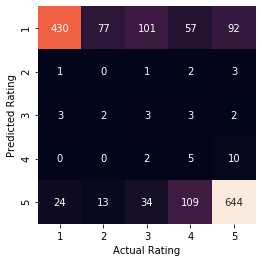

In [21]:
matrix = confusion_matrix(y_testglobal, y_pred_nb_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [23]:
NBsea = MultinomialNB(fit_prior = False)

NBsea.fit(tfidf_X_trainsea,y_trainsea)

y_pred_nb_testsea = NBsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_nb_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_nb_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_nb_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_nb_testsea, average = "weighted"))

Test Accuracy Score: 0.7262346876558949
Test Precision Score: 0.677890453129581
Test Recall Score: 0.7262346876558949
Test F1 Score: 0.6905947072900763


Text(91.68, 0.5, 'Predicted Rating')

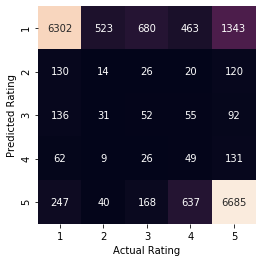

In [24]:
matrix = confusion_matrix(y_testsea, y_pred_nb_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

## Decision Tree

### Global

In [25]:
dtcgl = DecisionTreeClassifier()

dtcgl.fit(tfidf_X_trainglobal, y_trainglobal)

y_pred_dtc_testglobal = dtcgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_dtc_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))

Test Accuracy Score: 0.5834363411619283
Test Precision Score: 0.5487798909975826
Test Recall Score: 0.5834363411619283
Test F1 Score: 0.5635746063734657


Text(91.68, 0.5, 'Predicted Rating')

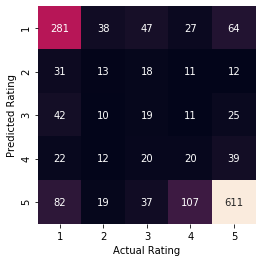

In [26]:
matrix = confusion_matrix(y_testglobal, y_pred_dtc_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

In [27]:
dtcsea = DecisionTreeClassifier()

dtcsea.fit(tfidf_X_trainsea, y_trainsea)

y_pred_dtc_testsea = dtcsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_dtc_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))

Test Accuracy Score: 0.6978548860927887
Test Precision Score: 0.6631725567059941
Test Recall Score: 0.6978548860927887
Test F1 Score: 0.6792039953526743


Text(91.68, 0.5, 'Predicted Rating')

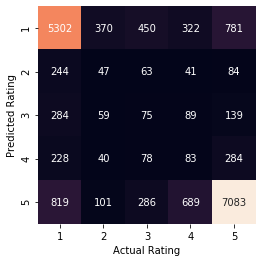

In [28]:
matrix = confusion_matrix(y_testsea, y_pred_dtc_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

## Random Forest

### Global

In [30]:
rfcgl = RandomForestClassifier()

rfcgl.fit(tfidf_X_trainglobal, y_trainglobal)

y_pred_rfc_testglobal = rfcgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_rfc_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))

Test Accuracy Score: 0.6594561186650185
Test Precision Score: 0.5453759642720786
Test Recall Score: 0.6594561186650185
Test F1 Score: 0.5759200816094541


Text(91.68, 0.5, 'Predicted Rating')

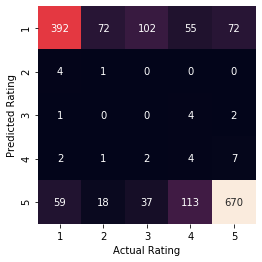

In [31]:
matrix = confusion_matrix(y_testglobal, y_pred_rfc_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [32]:
rfcsea = RandomForestClassifier()

rfcsea.fit(tfidf_X_trainsea, y_trainsea)

y_pred_rfc_testsea = rfcsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_rfc_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))

Test Accuracy Score: 0.7543927720192894
Test Precision Score: 0.6683298836617787
Test Recall Score: 0.7543927720192894
Test F1 Score: 0.6975917159300834


Text(91.68, 0.5, 'Predicted Rating')

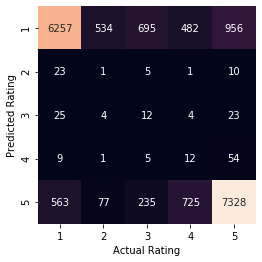

In [33]:
matrix = confusion_matrix(y_testsea, y_pred_rfc_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

## Support Vector Machine

### Global

In [34]:
SVMgl = svm.SVC()
SVMgl.fit(tfidf_X_trainglobal, y_trainglobal)

y_pred_SVM_testglobal = SVMgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_SVM_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_SVM_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_SVM_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_SVM_testglobal, average = "weighted"))

Test Accuracy Score: 0.6841779975278122
Test Precision Score: 0.5872740271369469
Test Recall Score: 0.6841779975278122
Test F1 Score: 0.5949577097822947


Text(91.68, 0.5, 'Predicted Rating')

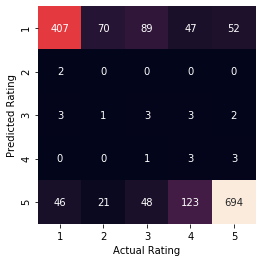

In [35]:
matrix = confusion_matrix(y_testglobal, y_pred_SVM_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [36]:
SVMsea = svm.SVC()
SVMsea.fit(tfidf_X_trainsea, y_trainsea)

y_pred_SVM_testsea = SVMsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_SVM_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_SVM_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_SVM_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_SVM_testsea, average = "weighted"))

Test Accuracy Score: 0.7723518651959426
Test Precision Score: 0.6895906690359215
Test Recall Score: 0.7723518651959426
Test F1 Score: 0.7100195104243602


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'Predicted Rating')

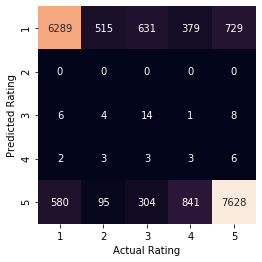

In [37]:
matrix = confusion_matrix(y_testsea, y_pred_SVM_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

## Gridsearch (Decision Tree)

In [39]:
dtc_param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2, 3, 4, 5, 6],
    'max_features': ['auto', 'log2', None],
    'min_samples_split' : [2, 3, 4, 5, 10, 15],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 10]
}


### Global

In [40]:
starttime = datetime.now()

#######

dt_gridgl = GridSearchCV(dtcgl, dtc_param_grid, cv=5, return_train_score=True)

dt_gridgl.fit(tfidf_X_trainglobal, y_trainglobal)

#######

print(datetime.now() - starttime)

0:03:05.044870


In [42]:
dt_grid_trainscoregl = np.mean(dt_gridgl.cv_results_['mean_train_score'])

dt_grid_testscoregl = dt_gridgl.score(tfidf_X_trainglobal, y_trainglobal)

print(f"Mean Training Score: {dt_grid_trainscoregl : .2%}")
print(f"Mean Test Score: {dt_grid_testscoregl : .2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_gridgl.best_params_

Mean Training Score:  54.13%
Mean Test Score:  68.45%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [44]:
dtcgl = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features='auto', min_samples_leaf=3, min_samples_split=2, random_state=22)

dtcgl.fit(tfidf_X_trainglobal, y_trainglobal)

y_pred_dtc_testglobal = dtcgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_dtc_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))

Test Accuracy Score: 0.5914709517923362
Test Precision Score: 0.4941763960002753
Test Recall Score: 0.5914709517923362
Test F1 Score: 0.5286617948305732


Compare to:
- Test Accuracy Score: 0.5834363411619283 (INCREASE)
- Test Precision Score: 0.5487798909975826 (DECREASE)
- Test Recall Score: 0.5834363411619283 (INCREASE)
- Test F1 Score: 0.5635746063734657 (DECREASE)

Text(91.68, 0.5, 'Predicted Rating')

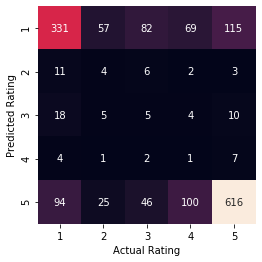

In [45]:
matrix = confusion_matrix(y_testglobal, y_pred_dtc_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [46]:
starttime = datetime.now()

#######

dt_gridsea = GridSearchCV(dtcsea, dtc_param_grid, cv=5, return_train_score=True)

dt_gridsea.fit(tfidf_X_trainsea, y_trainsea)

#######

print(datetime.now() - starttime)

1:01:07.326005


In [48]:
dt_grid_trainscoresea = np.mean(dt_gridsea.cv_results_['mean_train_score'])

dt_grid_testscoresea = dt_gridsea.score(tfidf_X_trainsea, y_trainsea)

print(f"Mean Training Score: {dt_grid_trainscoresea : .2%}")
print(f"Mean Test Score: {dt_grid_testscoresea : .2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_gridsea.best_params_

Mean Training Score:  54.50%
Mean Test Score:  76.34%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [49]:
dtcsea = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features='auto', min_samples_leaf=2, min_samples_split=2, random_state=22)

dtcsea.fit(tfidf_X_trainsea, y_trainsea)

y_pred_dtc_testsea = dtcsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_dtc_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))

Test Accuracy Score: 0.7209134748628124
Test Precision Score: 0.6480584233819887
Test Recall Score: 0.7209134748628124
Test F1 Score: 0.6733166501322316


Text(91.68, 0.5, 'Predicted Rating')

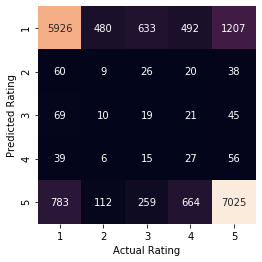

In [51]:
matrix = confusion_matrix(y_testsea, y_pred_dtc_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

## Gridsearch (Random Forest)

In [52]:
rf_param_grid = {
    'n_estimators' : [50, 100],
    'criterion' : ['gini'],
    'max_depth' : [None, 2, 4],
    'max_features': ['auto', 'log2', None],
    'min_samples_split' : [5, 10],
    'min_samples_leaf' : [1, 3]
}

### Global

In [53]:
starttime = datetime.now()

#######

rf_gridgl = GridSearchCV(rfcgl, rf_param_grid, cv=5)

rf_gridgl.fit(tfidf_X_trainglobal, y_trainglobal)

#######

print(datetime.now() - starttime)

0:12:38.999151


In [55]:
print(f"Training Accuracy: {rf_gridgl.best_score_ : .2%}")
print("Best Parameter Combination Found During Grid Search:")
rf_gridgl.best_params_

Training Accuracy:  66.63%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [56]:
rfcgl = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=10, random_state = 11, n_jobs=-1)

rfcgl.fit(tfidf_X_trainglobal, y_trainglobal)

y_pred_rfc_testglobal = rfcgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_rfc_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))

Test Accuracy Score: 0.6749072929542645
Test Precision Score: 0.5535034764322491
Test Recall Score: 0.6749072929542645
Test F1 Score: 0.5838392159702722


Compare to:
- Test Accuracy Score: 0.6594561186650185 (INCREASE)
- Test Precision Score: 0.5453759642720786 (INCREASE)
- Test Recall Score: 0.6594561186650185 (INCREASE)
- Test F1 Score: 0.5759200816094541 (INCREASE)

Text(91.68, 0.5, 'Predicted Rating')

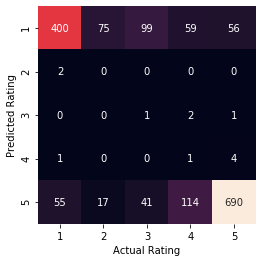

In [57]:
matrix = confusion_matrix(y_testglobal, y_pred_rfc_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [60]:
starttime = datetime.now()

#######

#rf_gridsea = GridSearchCV(rfcsea, rf_param_grid, cv=5)

#rf_gridsea.fit(tfidf_X_trainsea, y_trainsea)

#######

print(datetime.now() - starttime)

# Takes too long to run

0:00:00.000073


In [61]:
#print(f"Training Accuracy: {rf_gridsea.best_score_ : .2%}")
#print("Best Parameter Combination Found During Grid Search:")
#rf_gridsea.best_params_

In [62]:
rfcsea = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=10, random_state = 11, n_jobs=-1)

rfcsea.fit(tfidf_X_trainsea, y_trainsea)

y_pred_rfc_testsea = rfcsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_rfc_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))

Test Accuracy Score: 0.7599357020120836
Test Precision Score: 0.6736791608861975
Test Recall Score: 0.7599357020120836
Test F1 Score: 0.7004761029755466


Compared to:

- Test Accuracy Score: 0.7543927720192894 (INCREASE)
- Test Precision Score: 0.6683298836617787 (INCREASE)
- Test Recall Score: 0.7543927720192894 (INCREASE)
- Test F1 Score: 0.6975917159300834 (INCREASE)

Text(91.68, 0.5, 'Predicted Rating')

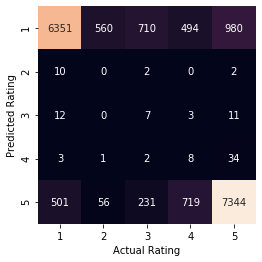

In [63]:
matrix = confusion_matrix(y_testsea, y_pred_rfc_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

## Gridsearch (Support Vector Machine)

In [58]:
svm_param_grid = {
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf', 'linear', 'nonlinear', 'sigmoid', 'polynomial']
}

In [37]:
starttime = datetime.now()

#######

svm_grid = GridSearchCV(SVM, svm_param_grid, refit=True, verbose=3)

svm_grid.fit(tfidf_X_train, y_train)

#######

print(datetime.now() - starttime)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.498, total=   2.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.503, total=   3.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.502, total=   2.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.501, total=   2.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.509, total=   2.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.662, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.658, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.655, total=   2.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.669, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 285, in _sparse_fit
    kernel_type = self._sparse_kernels.index(kernel)
ValueError: 'nonlinear' is not in list

  FitFailedWarning)


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.658, total=   2.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.653, total=   2.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.652, total=   2.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.662, total=   2.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.647, total=   2.2s
[CV] C=0.1, gamma=1, kernel=polynomial ...............................
[CV] ..... C=0.1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=polynomial ...............................
[CV] ..... C=0.1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=polynomial ...............................
[CV] .

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 285, in _sparse_fit
    kernel_type = self._sparse_kernels.index(kernel)
ValueError: 'polynomial' is not in list

  FitFailedWarning)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.484, total=   2.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.484, total=   2.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.483, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.483, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.483, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.662, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.658, total=   2.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.669, total=   2.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.654, total=   2.1s
[CV] C=0.1, gamma=0.001, kernel=nonlinear ............................
[CV] .. C=0.1, gamma=0.001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=nonlinear ............................
[CV] .. C=0.1, gamma=0.001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=nonlinear ............................
[CV] .. C=0.1, gamma=0.001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=nonlinear ............................
[CV] .. C=0.1, gamma=0.001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=nonlinear ............................
[CV] .. C=0.1, gamma=0.001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] .

[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.683, total=   2.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.703, total=   1.9s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.685, total=   1.9s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.678, total=   1.9s
[CV] C=1, gamma=1, kernel=polynomial .................................
[CV] ....... C=1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=1, gamma=1, kernel=polynomial .................................
[CV] ....... C=1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=1, gamma=1, kernel=polynomial .................................
[CV] ....... C=1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=1, gamma=1, kernel=polynomial .................................
[CV] .

[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.484, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.484, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.483, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.483, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.483, total=   2.2s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.691, total=   2.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.686, total=   2.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .

[CV] ........ C=10, gamma=1, kernel=linear, score=0.657, total=   2.2s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.650, total=   2.3s
[CV] C=10, gamma=1, kernel=nonlinear .................................
[CV] ....... C=10, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=nonlinear .................................
[CV] ....... C=10, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=nonlinear .................................
[CV] ....... C=10, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=nonlinear .................................
[CV] ....... C=10, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=nonlinear .................................
[CV] ....... C=10, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .

[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.658, total=   2.3s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.655, total=   2.3s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.669, total=   2.3s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.654, total=   2.3s
[CV] C=10, gamma=0.01, kernel=polynomial .............................
[CV] ... C=10, gamma=0.01, kernel=polynomial, score=nan, total=   0.0s
[CV] C=10, gamma=0.01, kernel=polynomial .............................
[CV] ... C=10, gamma=0.01, kernel=polynomial, score=nan, total=   0.0s
[CV] C=10, gamma=0.01, kernel=polynomial .............................
[CV] ... C=10, gamma=0.01, kernel=polynomial, score=nan, total=   0.0s
[CV] C=10, gamma=0.01, kernel=polynomial .............................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.681, total=   3.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.676, total=   3.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.692, total=   3.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.682, total=   3.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.686, total=   3.2s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.615, total=   2.2s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.621, total=   2.2s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .

[CV] .... C=100, gamma=0.01, kernel=linear, score=0.628, total=   2.2s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.627, total=   2.3s
[CV] C=100, gamma=0.01, kernel=nonlinear .............................
[CV] ... C=100, gamma=0.01, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=100, gamma=0.01, kernel=nonlinear .............................
[CV] ... C=100, gamma=0.01, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=100, gamma=0.01, kernel=nonlinear .............................
[CV] ... C=100, gamma=0.01, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=100, gamma=0.01, kernel=nonlinear .............................
[CV] ... C=100, gamma=0.01, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=100, gamma=0.01, kernel=nonlinear .............................
[CV] ... C=100, gamma=0.01, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.484, total=   2.3s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.483, total=   2.3s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.483, total=   2.3s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.483, total=   2.3s
[CV] C=100, gamma=0.0001, kernel=polynomial ..........................
[CV]  C=100, gamma=0.0001, kernel=polynomial, score=nan, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=polynomial ..........................
[CV]  C=100, gamma=0.0001, kernel=polynomial, score=nan, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=polynomial ..........................
[CV]  C=100, gamma=0.0001, kernel=polynomial, score=nan, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=polynomial ..........................
[CV]  

[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.622, total=   2.4s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.637, total=   2.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.635, total=   2.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.650, total=   2.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.652, total=   2.4s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.602, total=   2.4s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.613, total=   2.8s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] .

[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.603, total=   2.4s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.619, total=   2.3s
[CV] C=1000, gamma=0.0001, kernel=nonlinear ..........................
[CV]  C=1000, gamma=0.0001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=nonlinear ..........................
[CV]  C=1000, gamma=0.0001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=nonlinear ..........................
[CV]  C=1000, gamma=0.0001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=nonlinear ..........................
[CV]  C=1000, gamma=0.0001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=nonlinear ..........................
[CV]  C=1000, gamma=0.0001, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  

[Parallel(n_jobs=1)]: Done 625 out of 625 | elapsed: 14.2min finished


0:14:14.655374


In [38]:
print(svm_grid.best_params_)
print(svm_grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


In [39]:
SVM = svm.SVC(C=1, gamma=1, kernel='linear')
SVM.fit(tfidf_X_train, y_train)

y_pred_SVM_test = SVM.predict(tfidf_X_test)

print("Test Accuracy Score:", metrics.accuracy_score(y_test, y_pred_SVM_test))
print("Test Precision Score:", metrics.precision_score(y_test, y_pred_SVM_test, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, y_pred_SVM_test, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, y_pred_SVM_test, average = "weighted"))

Test Accuracy Score: 0.6728855721393034
Test Precision Score: 0.5796878109452736
Test Recall Score: 0.6728855721393034
Test F1 Score: 0.5961049438901596


Compared to:
- Test Accuracy Score: 0.6685323383084577 (INCREASE)
- Test Precision Score: 0.5906748506677536 (DECREASE)
- Test Recall Score: 0.6685323383084577 (INCREASE)
- Test F1 Score: 0.576083340899136 (INCREASE)

Text(91.68, 0.5, 'Predicted Rating')

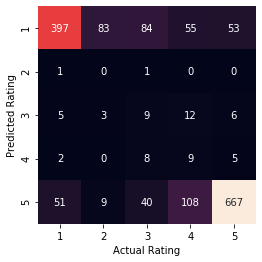

In [40]:
matrix = confusion_matrix(y_test, y_pred_SVM_test)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')